# EGFETs characteristics
**Maria Wróblewska,** _Engineering Thesis_
* PW
* PalmSens
* Institute of Physical Chemistry of PAS


## Input section

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import piecewise_regression


In [87]:
#Data Frame with EGFETs - just to see the headers
EGFETs_char_with_header = pd.read_csv('20221017_1400_PBSpH7 ozoncleaner_without 2 first.csv', delimiter = ',')

#Array with EGFETs characteristics - for next coding
EGFETs_char = np.genfromtxt('20221017_1400_PBSpH7 ozoncleaner_without 2 first.csv', delimiter=',', skip_header=1)



## All datas curves

In [88]:
# creating an array: Potential (logI) - the name is *EGFETs_char_for_calculations*

# converting the whole values in the *EGFETs_char* array into absolute values (in order to calculate next log10)
EGFETs_char_absolute = np.absolute(EGFETs_char)

# converting the whole values in the *EGFETs_char* array into log10 values
EGFETs_char_log = np.log10(EGFETs_char_absolute)

# The empty array with *EGFETs_char* dimensions
EGFETs_char_for_calculations = np.empty([EGFETs_char.shape[0],EGFETs_char.shape[1]]) 

# in *EGFETs_char_for_calculations* in even column idex put potential, in odd coulmn index put logarythmic value of current
for k in range(0, EGFETs_char_for_calculations.shape[1], 1):
    if k % 2 == 0:
        EGFETs_char_for_calculations[:, k] = EGFETs_char[:, k]
    else:
        EGFETs_char_for_calculations[:, k] = EGFETs_char_log[:, k]




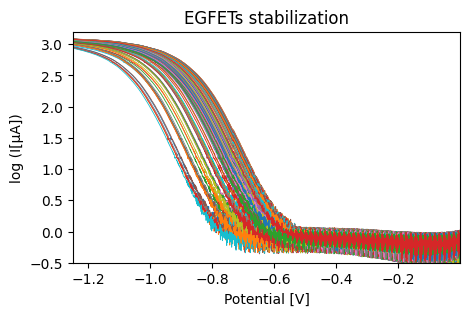

In [89]:
#curves from new array ## EGFETs_char_for_calculations

for i in range (3, EGFETs_char_for_calculations.shape[1], 4):
    x = EGFETs_char_for_calculations[:,i-1]
    y = EGFETs_char_for_calculations[:,i]
  
    plt.plot(x,y,  linewidth=0.6) #linewidth is an width of the curves
    plt.xlabel('Potential [V]') #x axis name
    plt.ylabel('log (I[\u03BCA])') #y axis name
    plt.title('EGFETs stabilization') #title of the plot
    plt.axis([-1.25016, -0.00053724, -0.5, 3.2]) #range of axises
    plt.rcParams["figure.figsize"] = (20,10) #size of the curve window 
    
    plt.show


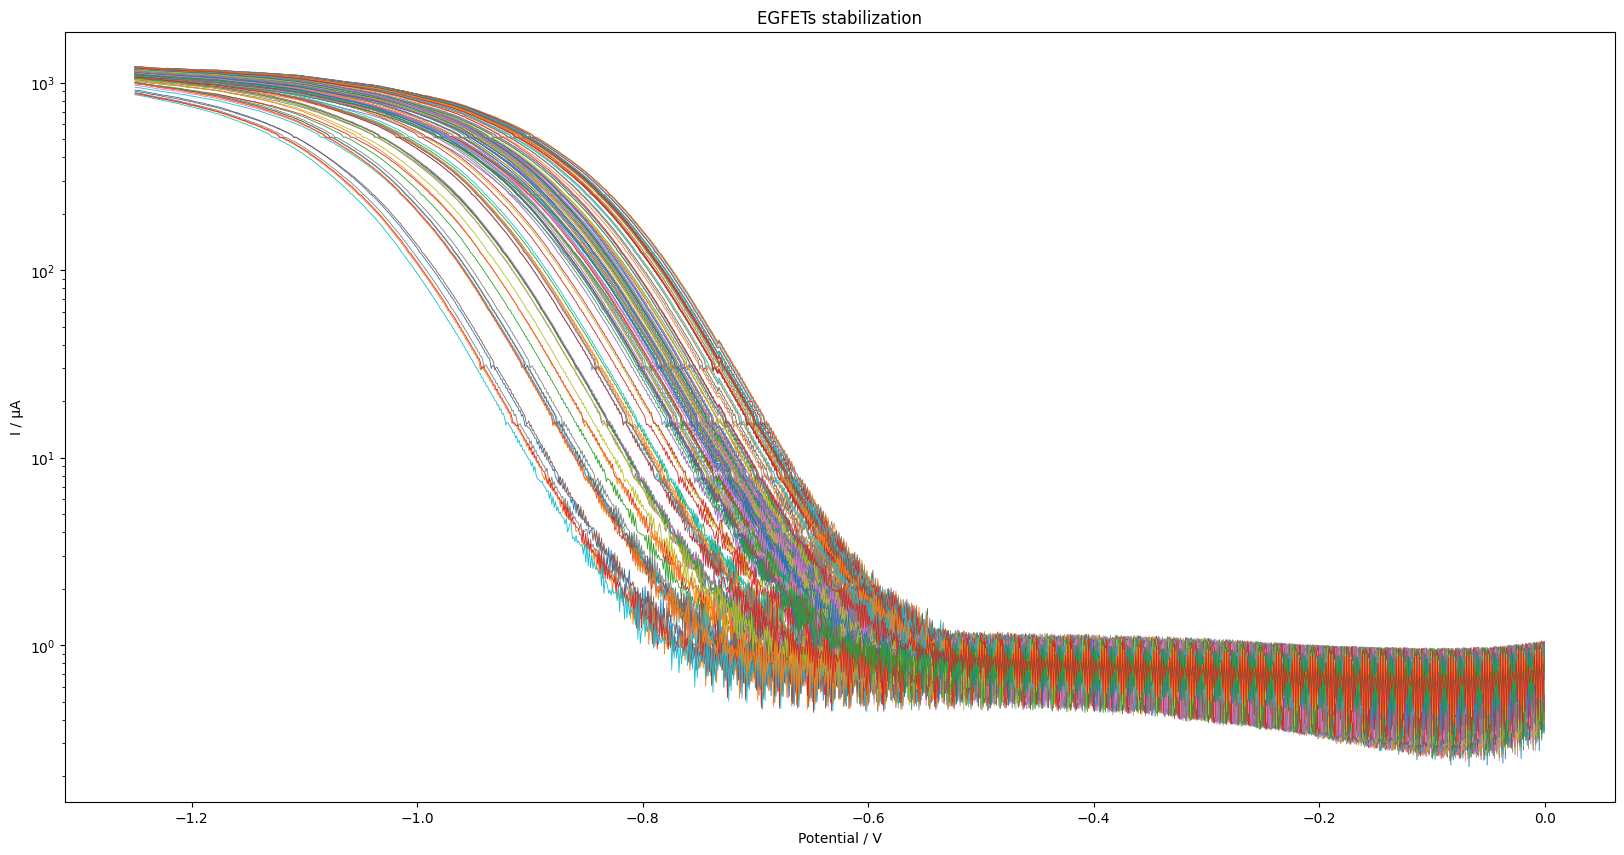

In [90]:
#curves with different y axis values than the above plot 

for i in range (3, EGFETs_char.shape[1], 4):
    x_1 = EGFETs_char[:,i-1]
    y_1 = abs(EGFETs_char[:,i]) # in order to use below the function 'yscale'
    
    plt.plot(x_1, y_1,  linewidth=0.6)
    plt.title('EGFETs stabilization')
    plt.yscale('log')
    plt.xlabel('Potential / V')
    plt.ylabel('I / \u03BCA')
    plt.rcParams["figure.figsize"] = (20,10) #size of the curve window
    plt.show

## Section 2: EGFETs (from 1 to n) stabilization

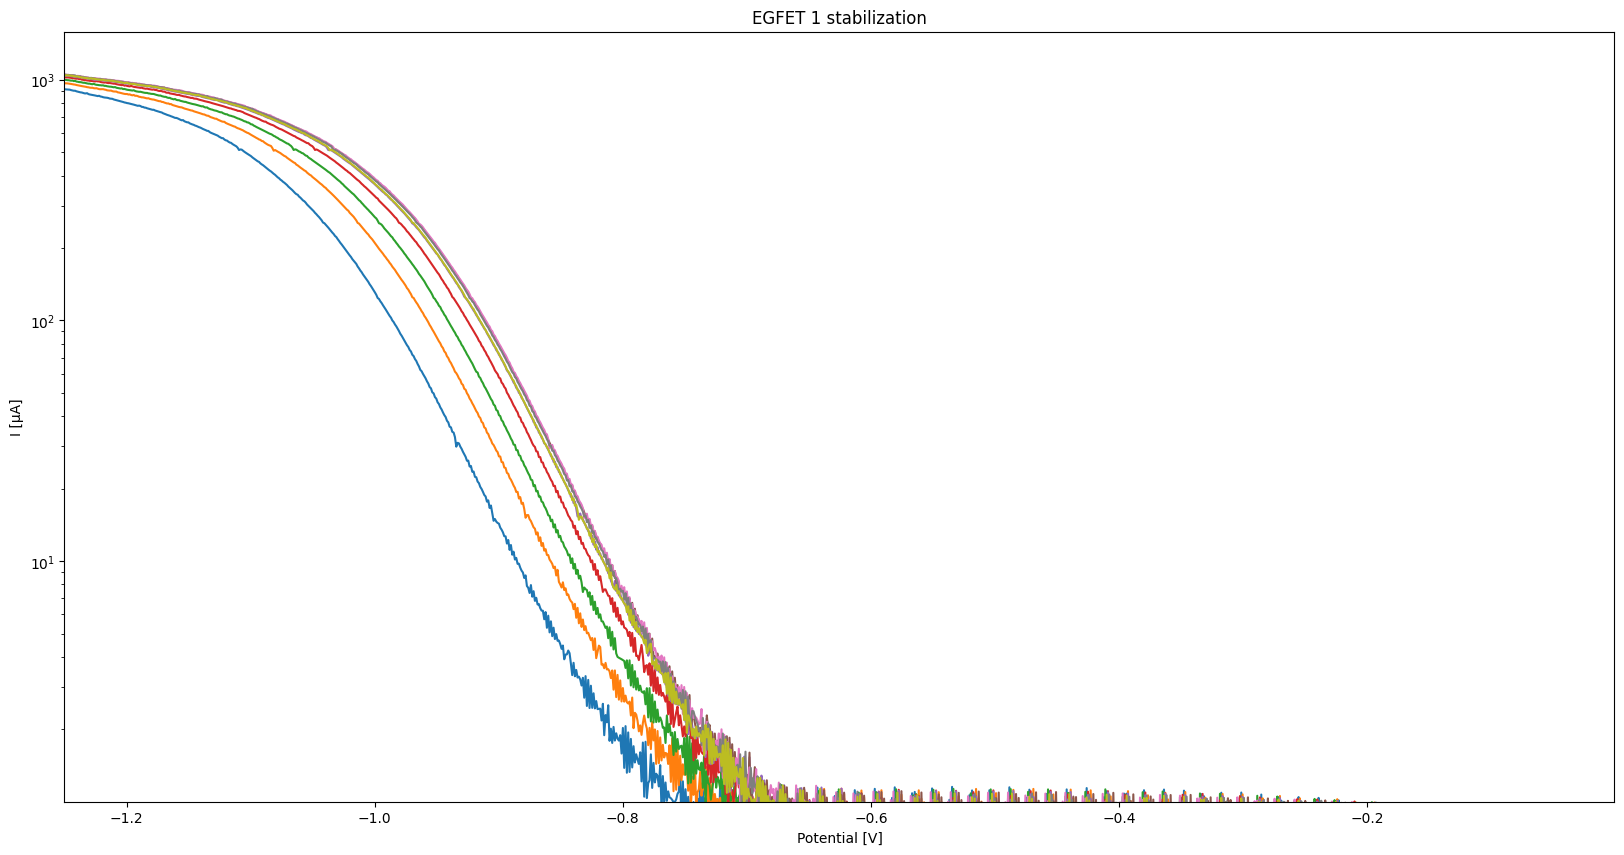

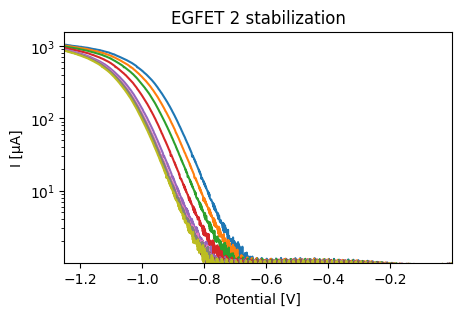

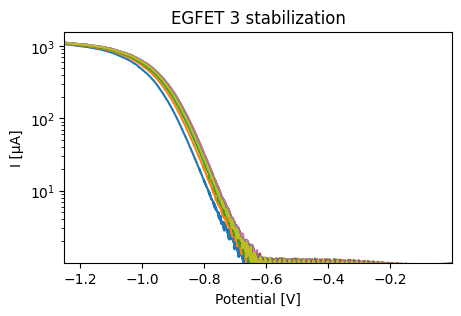

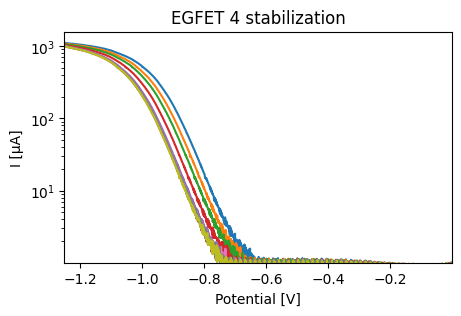

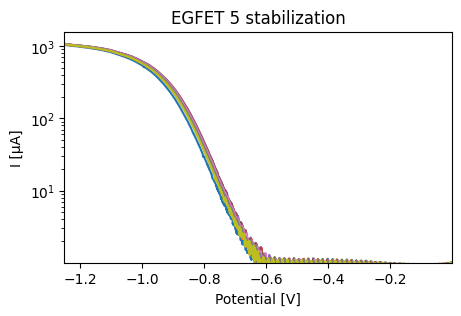

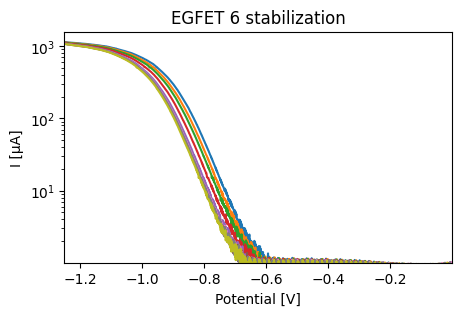

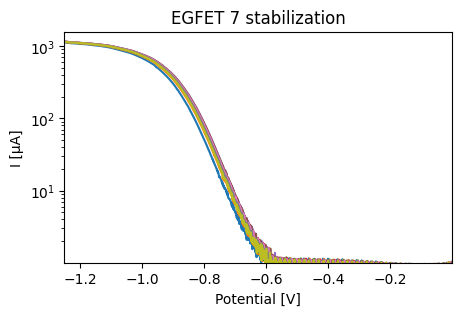

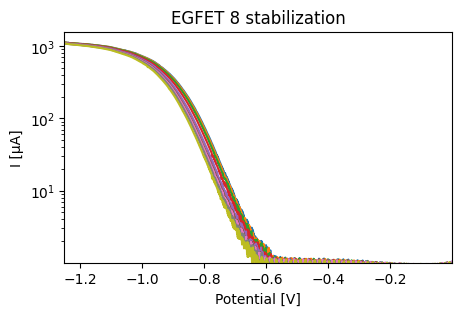

In [91]:
# choose EGFET1 and draw a plot
number_of_EGFETs= int(EGFETs_char.shape[1] / 64)
b = 0 #variable b just to switch the EGFETs number

# here it is used the  *EGFETs_char* array because on y axis there will be I*10^sth, not log10 I
for a in range (1, number_of_EGFETs, 1):
    EGFET_number = a
    for i in range(2 + 4*b, EGFETs_char.shape[1], 64):
        x_2 = EGFETs_char[:, i]
        y_2= abs(EGFETs_char[:, i+1])
        plt.plot(x_2, y_2)
       
        #the plot characterictics
    plt.rcParams["figure.figsize"] = (5,3)
    plt.title(f'EGFET {EGFET_number} stabilization')
    plt.yscale('log')
    plt.ylabel('I [µA]')
    plt.xlabel('Potential [V]') 
    plt.axis([-1.25016, -0.00053724, 10**0.0001, 10**3.2])
    plt.show()
    b = b+1

## Section 3: EGFET1 - the linearity section
* first and second derivative
* inflection point

514
515


<function matplotlib.pyplot.show(close=None, block=None)>

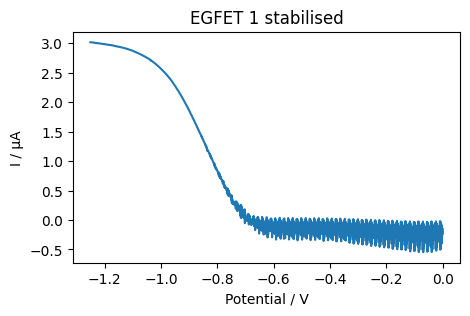

In [92]:
#In the future there shoud be a loop for each EGFET sth similat to the loop above
#where *stabilized_I_1* and *stabilized_Potential* will be calculated with number of changing EGFET included 
'''
# Potential for stabilized current for 1st EGFET:
## (number_of_EGFETs-1) * 64 : number of columns in the array with values for not stabilized measurements 
                               (one EGFET measurement - 4 columns, 16EGFETs - 64 columns)
## + 3 the 3rd coulmn after previous is an coulmn with stabilized EGFET1 potential
## - 1 the coulmn are indexed from 0                            
'''
stabilized_Potential = (number_of_EGFETs-1) * 64 + 3 - 1  
print (stabilized_Potential) #just to control

'''
# stabilized I for 1st EGFET is named as *stabilized_I*
## (number_of_EGFETs-1) * 64 : number of columns in the array with values for not stabilized measurements 
                               (one EGFET measurement - 4 columns, 16EGFETs - 64 columns)
## + 4 the th coulmn after previous is an column with stabilized EGFET1 current
## - 1 the coulmn are indexed from 0                            
'''
stabilized_I = (number_of_EGFETs-1) * 64 + 4 - 1  
print(stabilized_I) #just to control

x_3 = EGFETs_char_for_calculations[:, stabilized_Potential]
y_3 = EGFETs_char_for_calculations[:, stabilized_I ]
plt.plot (x_3, y_3)
plt.title('EGFET 1 stabilised')
plt.xlabel('Potential / V')
plt.ylabel('I / \u03BCA')
plt.show


In [93]:
'''
#calculation of second derivative
# 0 point of second derivative - the linearity is changing
# punkt przegięcia to punkt, gdzie II pochodna się zeruje


derivatives_array = np.empty([EGFETs_char_for_calculations.shape[0],3])
derivatives_array[:, 0] = EGFETs_char_for_calculations [:, 514] #adding the potential value into array

for p in range (0, EGFETs_char_for_calculations.shape[0]-1,1):

    #variables for derivation calculating in point x
    potential_in_x = EGFETs_char_for_calculations[p, 514]
    potential_in_x_plus_deltax = EGFETs_char_for_calculations[p + 1, 514]
    delta_x = potential_in_x_plus_deltax - potential_in_x
    current_x = EGFETs_char_for_calculations[p, 515]
    current_x_plus_delta_x = EGFETs_char_for_calculations[p+1, 515]

    first_derivative_value = (current_x_plus_delta_x - current_x) / delta_x
    #second derivative value
    #i

    derivatives_array[p, 1] = first_derivative_value #add to array the derivation value in this point

x_1d = derivatives_array [:, 0]
y_1d = derivatives_array [:, 1]


plt.plot(x_1d, y_1d)
#plt.show
plt.show

'''



'\n#calculation of second derivative\n# 0 point of second derivative - the linearity is changing\n# punkt przegięcia to punkt, gdzie II pochodna się zeruje\n\n\nderivatives_array = np.empty([EGFETs_char_for_calculations.shape[0],3])\nderivatives_array[:, 0] = EGFETs_char_for_calculations [:, 514] #adding the potential value into array\n\nfor p in range (0, EGFETs_char_for_calculations.shape[0]-1,1):\n\n    #variables for derivation calculating in point x\n    potential_in_x = EGFETs_char_for_calculations[p, 514]\n    potential_in_x_plus_deltax = EGFETs_char_for_calculations[p + 1, 514]\n    delta_x = potential_in_x_plus_deltax - potential_in_x\n    current_x = EGFETs_char_for_calculations[p, 515]\n    current_x_plus_delta_x = EGFETs_char_for_calculations[p+1, 515]\n\n    first_derivative_value = (current_x_plus_delta_x - current_x) / delta_x\n    #second derivative value\n    #i\n\n    derivatives_array[p, 1] = first_derivative_value #add to array the derivation value in this point\n\n

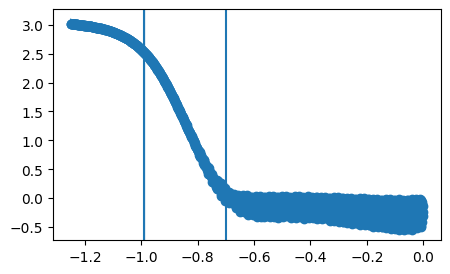


                    Breakpoint Regression Results                     
No. Observations                     1164
No. Model Parameters                    6
Degrees of Freedom                   1158
Res. Sum of Squares               12.4451
Total Sum of Squares              1885.27
R Squared                        0.993399
Adjusted R Squared               0.993365
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const               0.919981       0.0991       9.2874      7.58e-20      0.72563       1.1143
alpha1              -1.73313       0.0882      -19.643      2.28e-74      -1.9062        -1.56
beta1               -7.53943        0.116      -65.136             -      -7.7665      -7.3123
beta2                 8.9857       0.0776       115.82             -       8.8335       9.1379
breakpoint1      

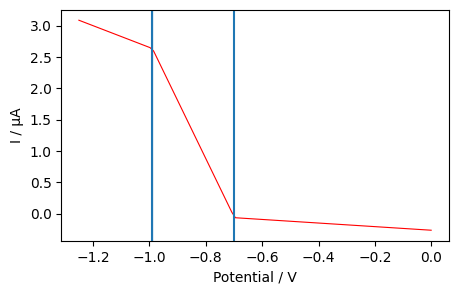

In [96]:
#fitting linear functions with two inflection points
EGFET_fit = piecewise_regression.Fit(x_3, y_3, n_breakpoints=2)

#drawing a fitted points
EGFET_fit.plot()
plt.show()


#saving the summary of the regression as *summary*
summary = EGFET_fit.summary()

# Pass in standard matplotlib keywords to control any of the plots
EGFET_fit.plot_fit(color="red", linewidth=0.8)
EGFET_fit.plot_breakpoints()
EGFET_fit.plot_breakpoint_confidence_intervals()
plt.xlabel('Potential / V')
plt.ylabel('I / \u03BCA')
plt.show()
plt.close()



In [95]:
### NOW I HAVE NO BETTER IDEA HOW TO READ VALUES FROM THE *summary*
### if formatiing of the *summary won't change it could be a good way, in other cases it'll break:

# I found the position of breaking points and I changed them into float 
breakpoint_1 = float(summary[1305:1314])
breakpoint_2 =float(summary[1400:1409])
print('breakpoint 1 = ', breakpoint_1)
print('breakpoint 2 = ', breakpoint_2)



# from GitHub preposition - I don't know yet how make it works in this:
'''
# Get the key results of the fit
EGFET_results = EGFET_fit.get_results()
EGFET_estimates = EGFET_results["estimates"]
'''

# Now I am going to create a linear regresion beetween braking points
# then I'll do the same with EGFET after modification and then will be time to compare results and more play

breakpoint 1 =  -0.989356
breakpoint 2 =  -0.698239


'\n# Get the key results of the fit\nEGFET_results = EGFET_fit.get_results()\nEGFET_estimates = EGFET_results["estimates"]\n'